In [1]:
# P.166 - Loading the data
frame <- read.csv( "DataSet-Hurricanes.csv" )

In [2]:
head( frame, n=8 )

,Name,Year,WindMPH,AffectedStates,Deaths,Sex,DamageMillions
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,Easy,1950,120,FL,2,F,32
2,King,1950,130,FL,4,M,275
3,Able,1952,85,SC,3,M,25
4,Barbara,1953,85,NC,1,F,9
5,Florence,1953,85,FL,0,F,2
6,Carol,1954,120,"NC,NY,CT,RI",60,F,4051
7,Edna,1954,120,"MA,ME",20,F,352
8,Hazel,1954,145,"SC,NC,MD",20,F,2473


In [3]:
library( ggplot2 )

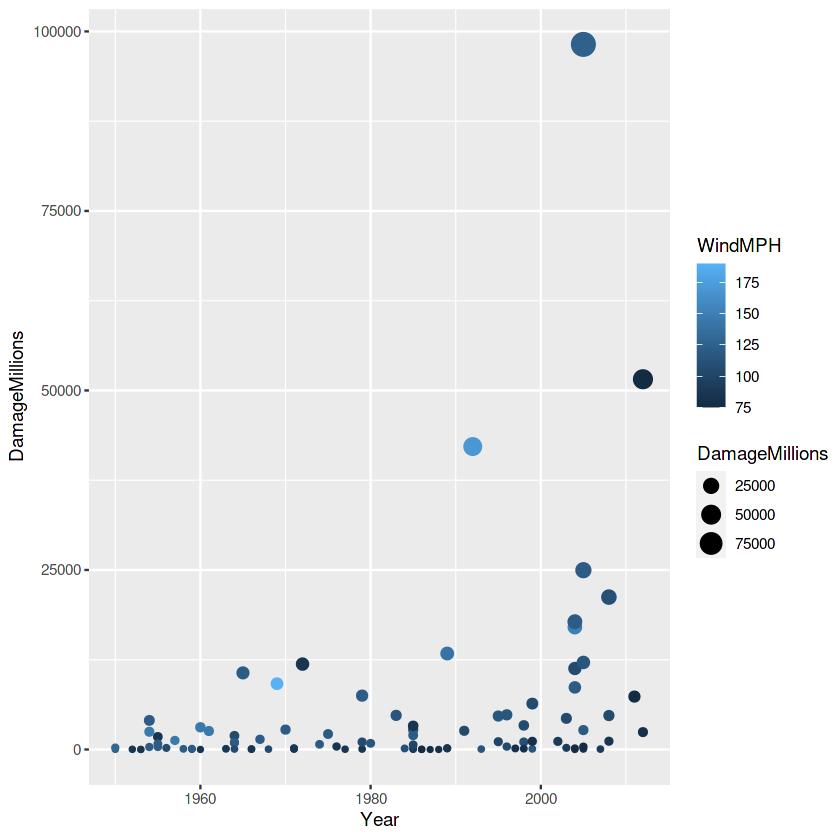

In [4]:
ggplot( data=frame, aes( x=Year, y=DamageMillions, 
                         size=DamageMillions,
                         color=WindMPH ) ) + geom_point( )
#-----------------------------------------------------------
# P.168 - Retaining objects
damage_plot <- ggplot( data=frame,
                  aes( x=Year, y=DamageMillions,
                  size=DamageMillions,
                  color=WindMPH ) )

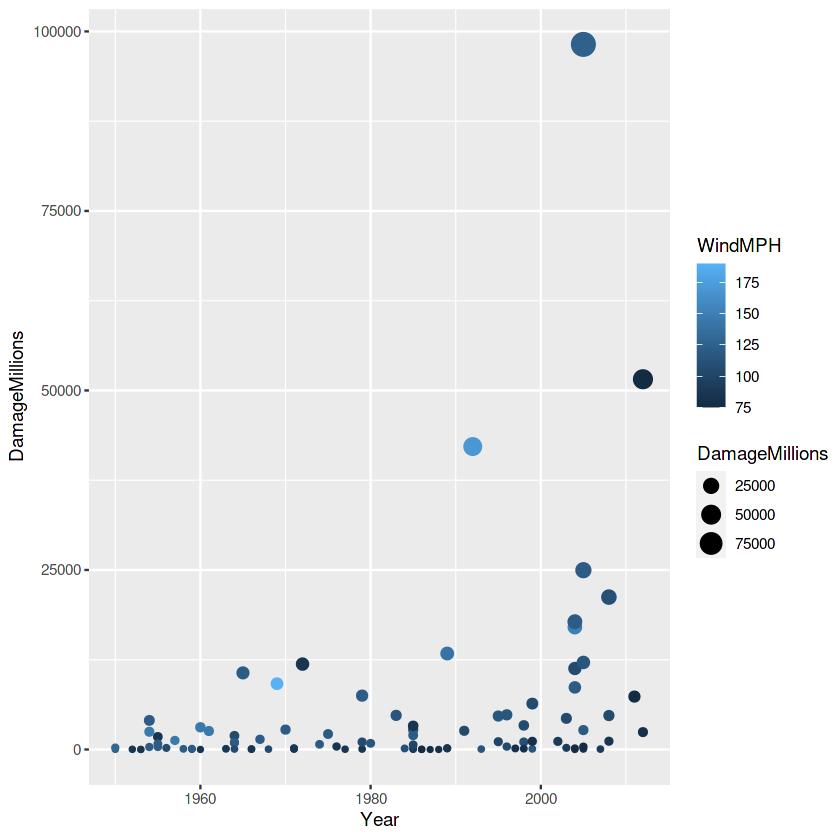

In [5]:
damage_plot + geom_point( )

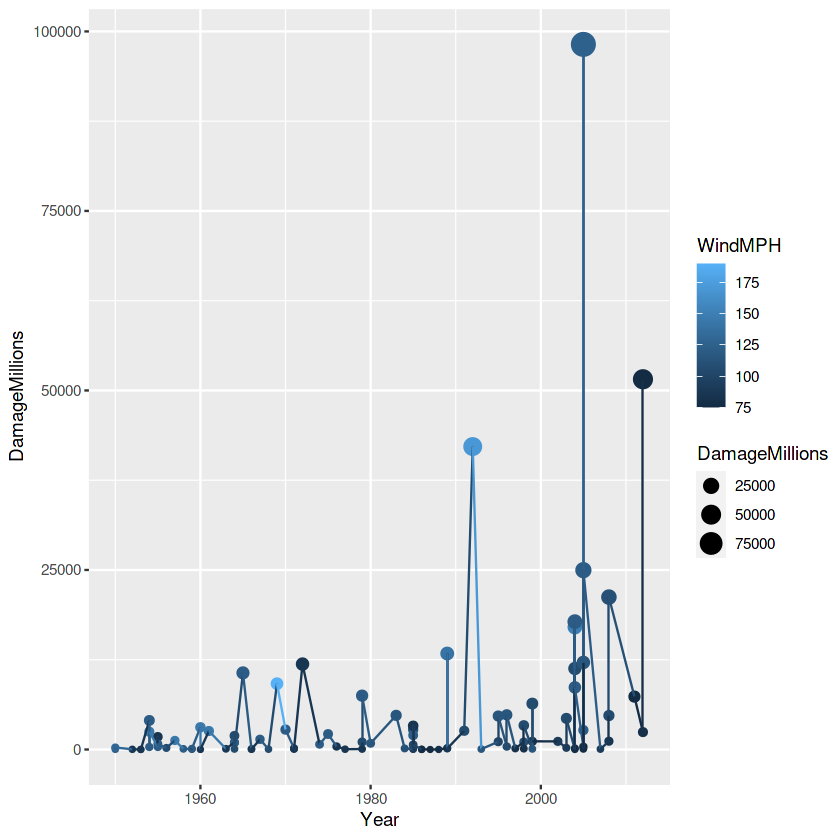

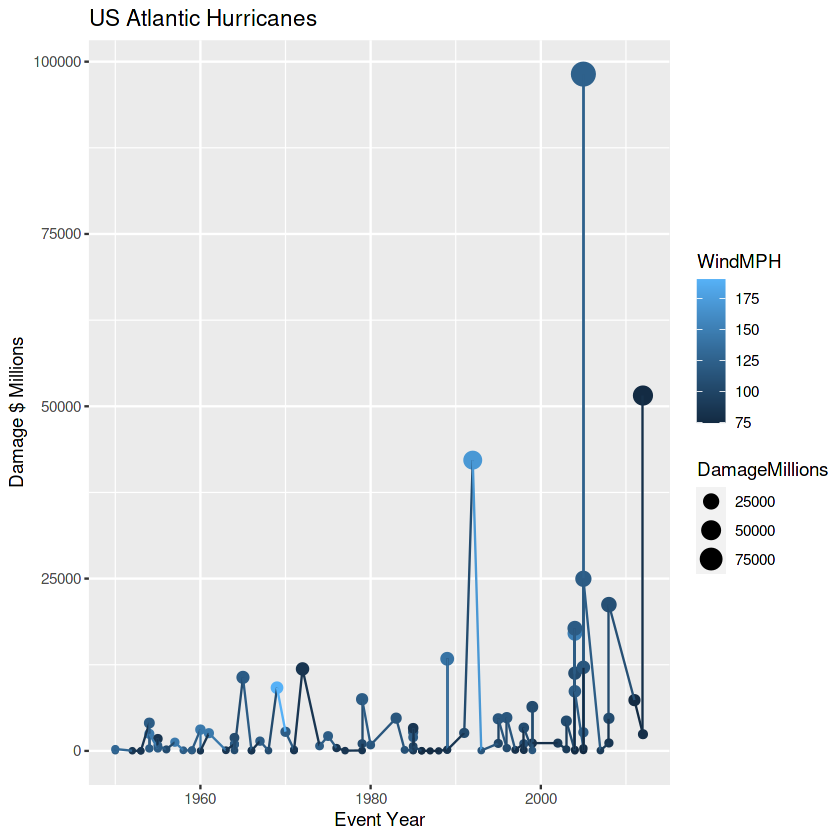

In [6]:
damage_plot + geom_point( ) + geom_line( size=0.5 )
#-----------------------------------------------------------
# P.170 - Overriding labels
damage_plot + ggtitle( "US Atlantic Hurricanes" ) +
xlab( "Event Year" ) + ylab( "Damage $ Millions" ) +
geom_point( ) +
geom_line( size=0.5 )

ERROR: Error in windowsFonts(): could not find function "windowsFonts"


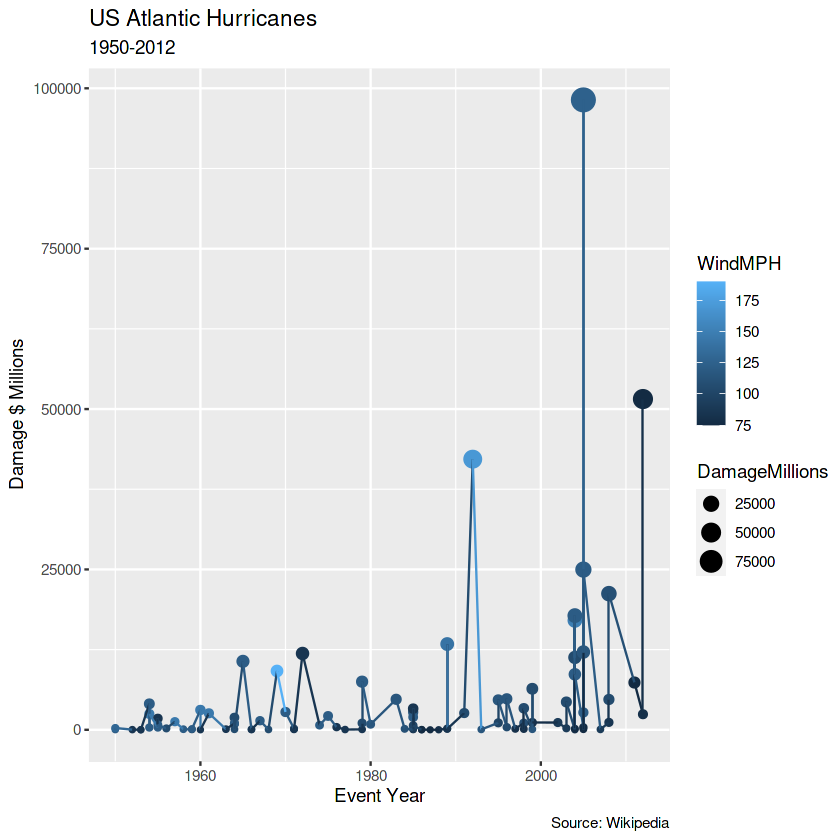

In [7]:
label_object <- labs( title="US Atlantic Hurricanes", 
                      subtitle="1950-2012",
                      x="Event Year",
                      y="Damage $ Millions",
                      caption="Source: Wikipedia" )
damage_plot + 
label_object +
geom_point( ) +
geom_line( size=0.5 ) 
#----------------------------------------------------------
# P.172 - Adding a theme
windowsFonts()

In [ ]:
install.packages( "extrafont", dependencies=TRUE )

In [ ]:
library( extrafont )

In [ ]:
font_import( prompt=FALSE )

In [ ]:
loadfonts( device = "win" )

In [ ]:
length( windowsFonts( ) )

In [ ]:
theme_object <- theme(
  plot.title=element_text( color="Red", family="Wide Latin" ),
  plot.subtitle=element_text( color="Red" ),
  axis.title.x=element_text( color="Red", face="bold" ),
  axis.title.y=element_text( color="Red", face="bold" ),
  plot.caption=element_text( color="Black", face="italic" ),
  legend.background = element_rect( color="Gray" ) )

In [ ]:
damage_plot +
label_object +
geom_point( ) +
geom_line( size=0.5 ) +
theme_object
#----------------------------------------------------------
#P.175 - Comparing boxes (Boxplot)
head( frame, n=8 )

In [ ]:
gender_plot <- ggplot( data=frame,
                       aes( x=Sex, y=Deaths, color=Sex ), 
                       size=3 )
gender_plot + 
label_object + 
  xlab( "Gender" ) + 
  ylab( "Number of Fatalities" ) +
geom_jitter( ) +
geom_boxplot( alpha=0.5 ) + ylim( 10, 200 ) +
theme_object
#----------------------------------------------------------
# P.176 - Identifying extremes
fatal_plot <- ggplot( data=frame, 
                      aes( x=Year, y=Deaths ) )
fatal_plot +
label_object +
ylab( "Number of Fatalities" ) +
geom_point( aes( color=WindMPH )) + 
geom_text( aes( label=ifelse( Deaths > 180,
                as.character( Name ), "" ),
                hjust=1.1 ) 
            ) +
geom_smooth() +
theme_object
#-----------------------------------------------------------
# P.178 - Limiting focus
windspeed_plot <- ggplot( data=frame, 
                      aes( x=Year, y=Deaths ) )
windspeed_plot +
geom_point( aes( color=WindMPH ), size=10, shape=17 ) + 
label_object +
ylab( "Number of Fatalities" ) +
xlim( 1980, 2000 ) +
ylim( 0, 65 ) +
theme_object
#-----------------------------------------------------------
# P.179 - Zooming focus
strike_plot <- ggplot( data=frame, aes( x=Year, fill=Sex ) )

In [ ]:
strike_plot +
label_object +
ylab( "Number of Strikes" ) +
geom_bar( ) +
coord_cartesian( xlim=c( 1980, 2000 ) ) +
theme_object
#----------------------------------------------------------- 
# P.180 - Displaying facets
frame.tx <- frame[ grep( "TX", frame$AffectedStates ) , ]

In [ ]:
texas_plot <- ggplot( data=frame.tx, 
                      aes( x=Year,y=DamageMillions,
                          size=Deaths, color=AffectedStates))
texas_plot + 
label_object + 
geom_point( aes( size=Deaths ) ) + 
facet_grid( AffectedStates~.  ) + 
theme_object
#-----------------------------------------------------------
# P.181 - cont'd
frame.fl <- frame[ grep( "FL", frame$AffectedStates ) , ]

In [ ]:
florida_plot <- ggplot( data=frame.fl, aes(x=Year ) )

In [ ]:
florida_plot +
label_object +
ylab( "Number of Strikes in Florida" ) +
geom_histogram( bins=20, aes(fill=AffectedStates),
                  color="Black" ) +
theme_object
#--End------------------------------------------------------